1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Only one global minum was found. Changing the initial guess does not modify the final result.
global minimum: x = [-0.0898, 0.7127], f(x0) = -1.0316


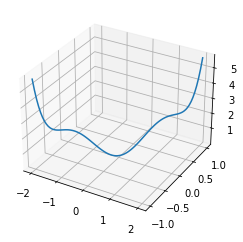

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats
import math
import scipy

def func(x): #defining the function
    return (4-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2 +x[0]*x[1]+(4*x[1]**2 -4)*x[1]**2

x_interval = [-2,2] #restricting the regions given the hints
y_interval = [-1,1]

x =[]
x.append(np.linspace(x_interval[0],x_interval[1], 100))
x.append(np.linspace(y_interval[0],y_interval[1], 100))

ax = plt.axes(projection='3d')
ax.plot3D(x[0], x[1],func(x))

#sol = optimize.minimize_scalar(func, args = (5,))
#print(sol)
x0 = [0,0] #initial guess
res = optimize.basinhopping(func,x0)
#print(res)
print("Only one global minum was found. Changing the initial guess does not modify the final result.")
print("global minimum: x = [%.4f, %.4f], f(x0) = %.4f" % (res.x[0], res.x[1], res.fun))

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

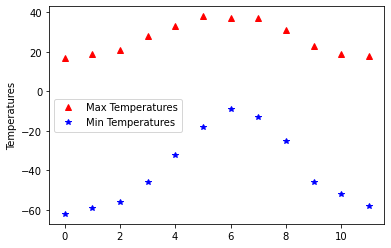

A = 36.65 +- 1.20
f = 5.68 +- 0.16


ValueError: operands could not be broadcast together with shapes (12,) (3,) 

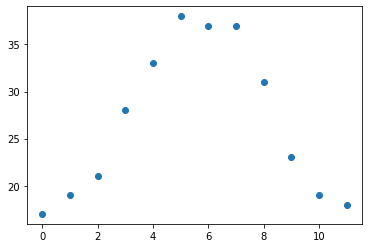

In [47]:
#importing data
Tmax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
Tmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
x = [i for i in range(len(Tmax))]

#setting the plot
plt.plot(x,Tmax, 'r^', label = 'Max Temperatures')
plt.plot(x,Tmin,'b*', label= 'Min Temperatures')
plt.ylabel("Temperatures")
plt.legend()
plt.show()

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = optimize.curve_fit(gauss_function, x, Tmax, full_output=False)

print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("f = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))

plt.scatter(x, Tmax, label='Tmax')
plt.plot(x, gauss_function(x, popt[1], popt , math.sqrt(pcov[1,1])), label='fitted function')
plt.legend(loc='best')

# from scipy.interpolate import interp1d
# interp_time = np.linspace(0,11,100)
# #finding and plotting the interpolation for both temperatures
# cubic_interp_max = interp1d(x, Tmax, kind='cubic')
# cubic_interp_min = interp1d(x, Tmin, kind='cubic')
# cubic_results_max = cubic_interp_max(interp_time)
# cubic_results_min = cubic_interp_min(interp_time)
# plt.plot(interp_time, cubic_results_max , 'r-')
# plt.plot(interp_time, cubic_results_min, 'b-')
# plt.plot(x,Tmax, 'rs')
# plt.plot(x,Tmin,'bs')
# plt.ylabel("Interpolated temperatures")
# plt.show()
# plt.legend()



3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

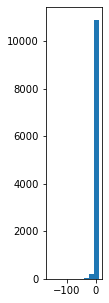

[1.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 6.0000e+00
 9.0000e+00 2.0000e+01 1.9400e+02 1.0894e+04]
[1.0, 1.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.449489742783178, 3.0, 4.47213595499958, 13.92838827718412, 104.37432634513145]


In [83]:
import pickle
import pandas as pd
import math as m

#importing data from file
df = pd.read_pickle('data/residuals_261.pkl')
df = pd.DataFrame(df.item())
res = df['residuals'].to_numpy()

#plotting the data
fig,ax = plt.subplots(figsize = (1,5))
b = 10 #setting the number of bins for the plot
counts, edges, plot = ax.hist(res, bins = b)
plt.show()

#setting sigma values
sigma = []
for i in range(b):
    sigma.append(m.sqrt(counts[i]))

#define a fitting function


#goodness-of-fit test



4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [98]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt --no-check-certificate
import numpy as np
import pandas as pd

#!type munich_temperatures_average_with_bad_data.txt

def f(t,a,b,c):
    return a * cos(2*np.pi*t + b) +c

data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=" ", header=None)
data.columns = ["Year", "Temperature"]
data
#datas = data.drop(data[float(data['Year']) < 2008 and float(data['Year']) > 2012].index).reset_index()
#datas

,Year,Temperature
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440
